# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [144]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [146]:
import pandas as pd

bos = pd.read_csv('/Users/shivanginimarjiwe/Desktop/repo/DataScienceGuidedCapstone/Case Study - Boston Housing/boston.csv')
print(bos.shape)
bos.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's rename the target variable of `MEDV` to `PRICE` which will contain the prices. 

In [148]:
bos = bos.rename(columns={"MEDV":"PRICE"})
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [95]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

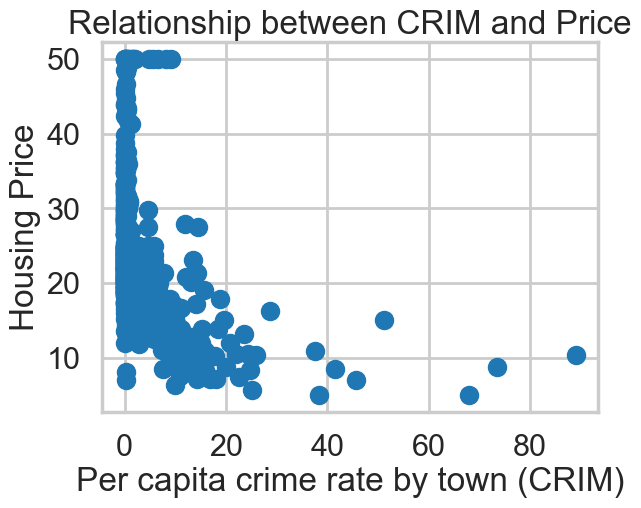

In [105]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [ ]:
# your turn: describe relationship
# Answer

# Relationship: CRIM vs. PRICE
# The relationship between CRIM (per capita crime rate) and PRICE (housing price) appears negative and non-linear. 
# Higher crime rates are generally associated with lower housing prices, but there are significant outliers.

# Outliers:
# A few observations show high housing prices even at very low crime rates, and some towns with high crime rates still have houses priced at mid to high ranges. 
# These outliers could represent special cases (e.g., luxury properties or outliers in crime measurement).

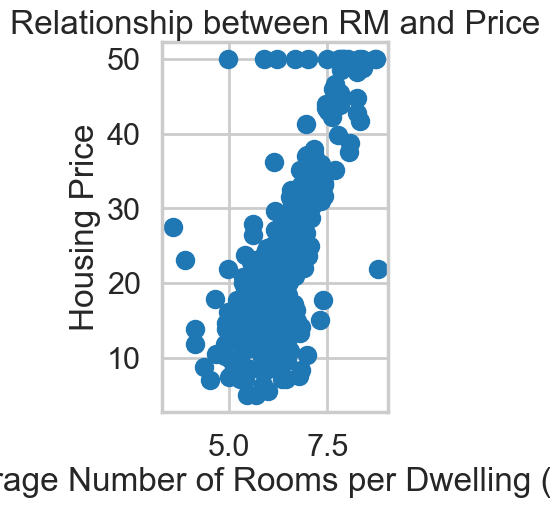

In [21]:
# your turn: scatter plot between *RM* and *PRICE*
plt.subplot(1, 2, 1)
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average Number of Rooms per Dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

# Story:

# RM (Number of Rooms) vs. PRICE:
# This relationship appears to be positive and somewhat linear, with housing prices increasing as the average number of rooms per dwelling increases.
# Outliers: Some houses with 7 or more rooms have surprisingly low prices, suggesting possible data anomalies or unique cases.
# Larger houses generally command higher prices, as expected.


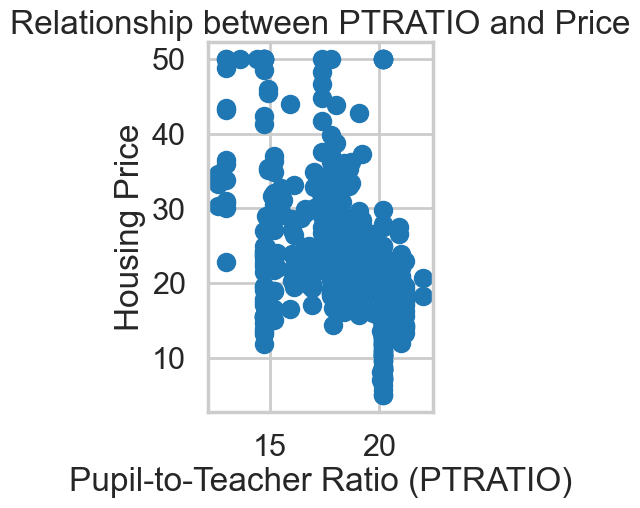

In [23]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.subplot(1, 2, 2)
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
plt.show()


#Story:

# PTRATIO (Pupil-to-Teacher Ratio) vs. PRICE:
# There is a negative relationship, meaning that higher pupil-to-teacher ratios (indicative of lower school quality) 
#correspond to lower housing prices.
#Outliers: A few high-priced houses exist in towns with high PTRATIO, possibly due to factors like location or other amenities.


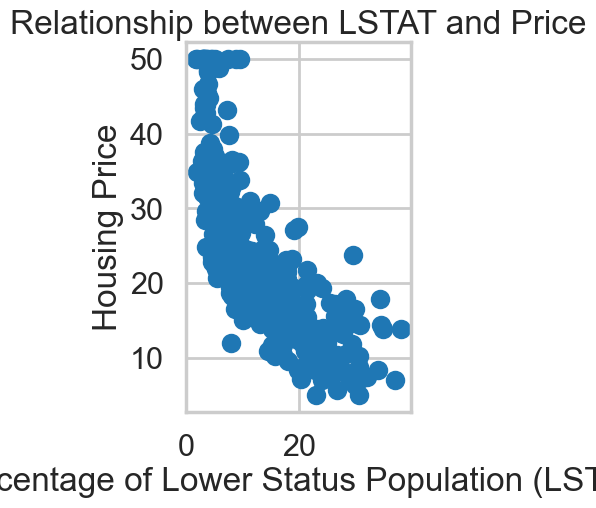

In [31]:
# your turn: create some other scatter plots

# Other Numeric Variables of Interest

# LSTAT (Lower Status Population %):Why interesting? It is a strong indicator of socioeconomic status, 
# which often correlates with housing prices.

# TAX (Property Tax Rate): Why interesting? High property taxes might discourage buyers and affect housing prices.


# LSTAT vs PRICE
plt.subplot(1, 2, 1)
plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel("Percentage of Lower Status Population (LSTAT)")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")

plt.show()

# Story:

# LSTAT (Lower Status Population %) vs. PRICE:
# There is a strong negative, non-linear relationship, where housing prices decrease sharply as the percentage of lower-status population 
#increases.
# Outliers: High housing prices in areas with a high percentage of lower-status population are rare but present.





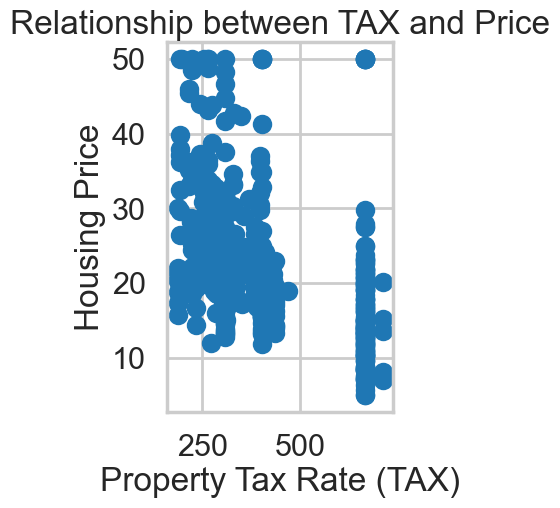

In [33]:
# TAX vs PRICE
plt.subplot(1, 2, 2)
plt.scatter(bos.TAX, bos.PRICE)
plt.xlabel("Property Tax Rate (TAX)")
plt.ylabel("Housing Price")
plt.title("Relationship between TAX and Price")


plt.show()

# Story:
# TAX (Property Tax Rate) vs. PRICE:
# The relationship appears slightly negative and non-linear. Areas with high property taxes tend to have lower housing prices, 
# likely reflecting buyer reluctance to invest in expensive tax regions.
# Outliers: Some houses with high prices exist in high-tax regions, suggesting external factors like amenities or desirability.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

In [35]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

<Axes: xlabel='RM', ylabel='PRICE'>

### Histograms
***


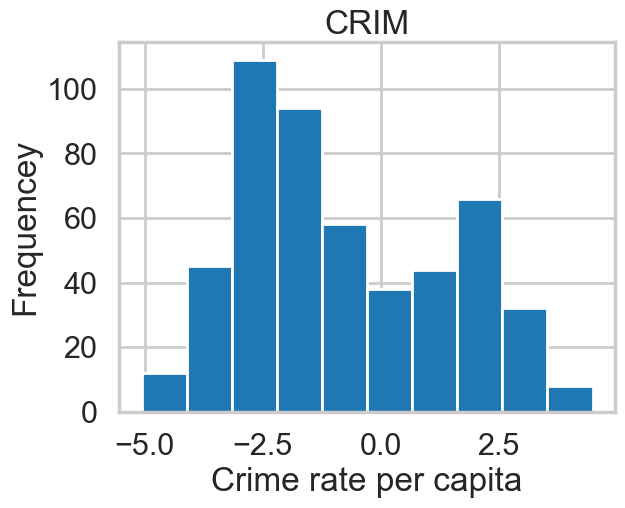

In [39]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

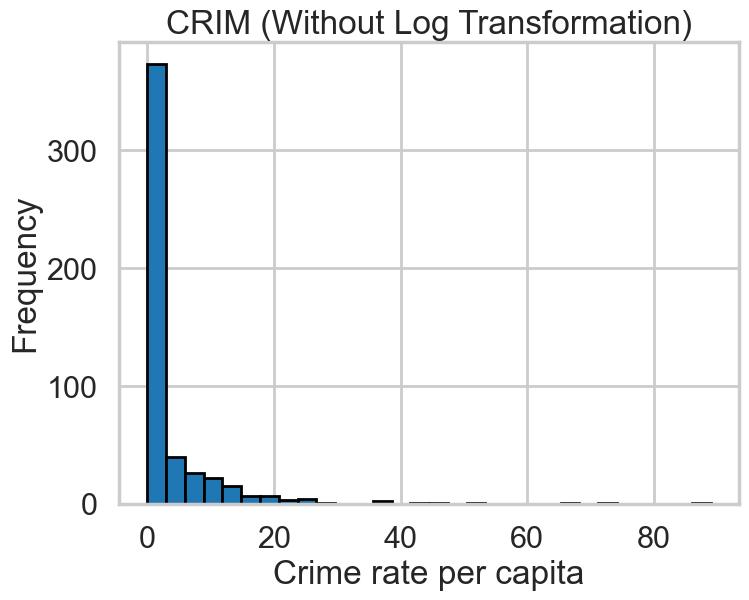

In [41]:
#your turn
plt.figure(figsize=(8, 6))
plt.hist(bos.CRIM, bins=30, edgecolor='k')
plt.title("CRIM (Without Log Transformation)")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

# Observations:
# 1. The purpose of taking the log is to normalize highly skewed data.
# 2. Without the log transformation, CRIM shows a heavy positive skew, with most values clustered near zero.
# 3. The log transformation reveals more granularity in the distribution and makes patterns more apparent.



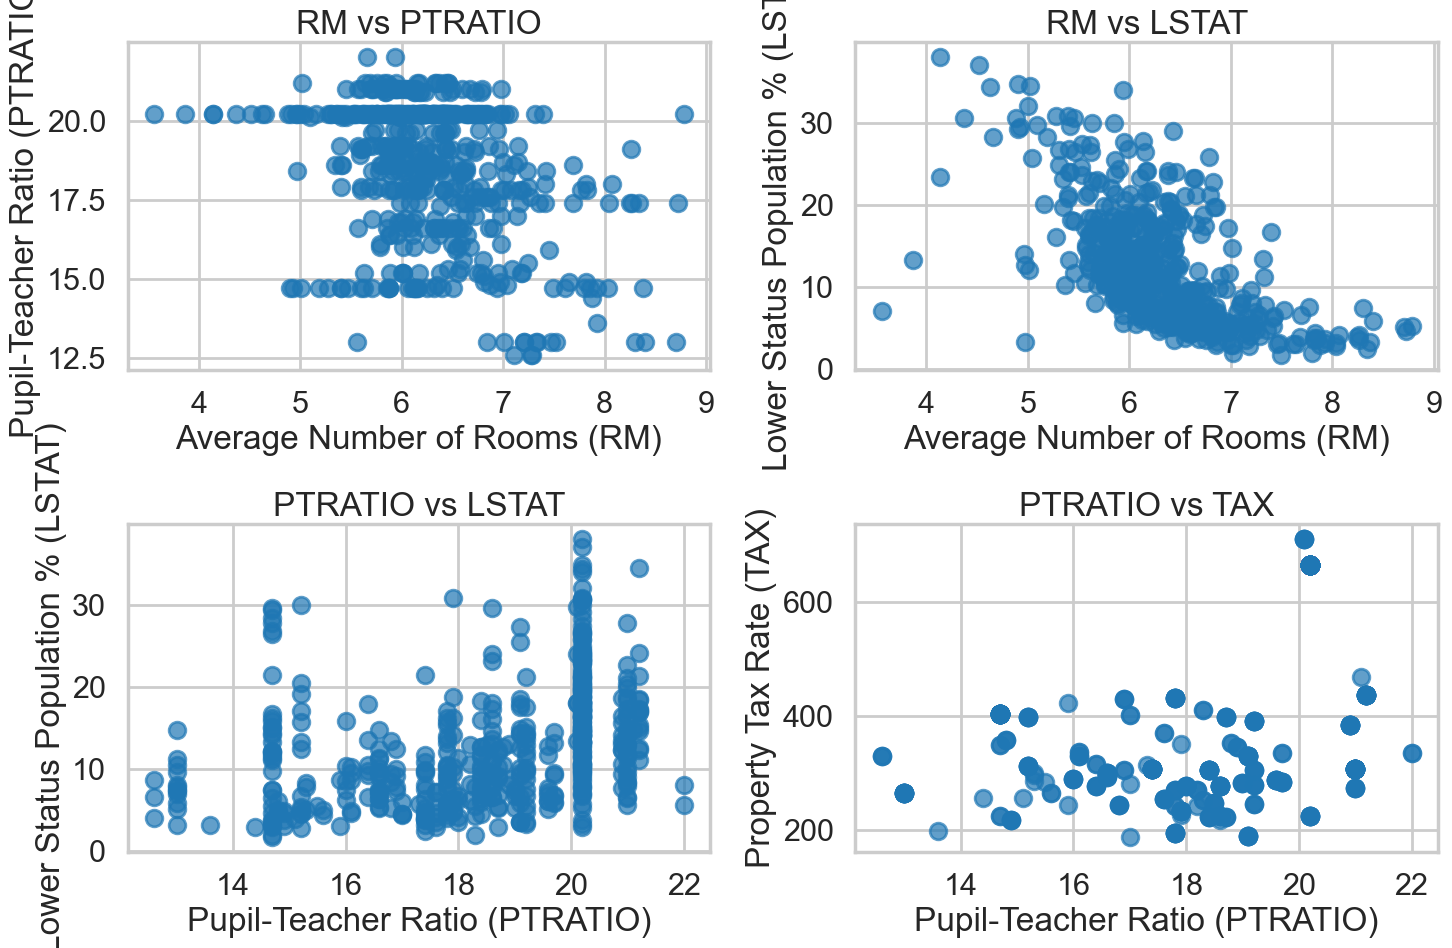

In [43]:
# Scatterplot for RM vs PTRATIO and other variables (LSTAT, TAX)
plt.figure(figsize=(15, 10))

# RM vs PTRATIO
plt.subplot(2, 2, 1)
plt.scatter(bos.RM, bos.PTRATIO, alpha=0.7)
plt.title("RM vs PTRATIO")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Pupil-Teacher Ratio (PTRATIO)")

# RM vs LSTAT
plt.subplot(2, 2, 2)
plt.scatter(bos.RM, bos.LSTAT, alpha=0.7)
plt.title("RM vs LSTAT")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Lower Status Population % (LSTAT)")

# PTRATIO vs LSTAT
plt.subplot(2, 2, 3)
plt.scatter(bos.PTRATIO, bos.LSTAT, alpha=0.7)
plt.title("PTRATIO vs LSTAT")
plt.xlabel("Pupil-Teacher Ratio (PTRATIO)")
plt.ylabel("Lower Status Population % (LSTAT)")

# PTRATIO vs TAX
plt.subplot(2, 2, 4)
plt.scatter(bos.PTRATIO, bos.TAX, alpha=0.7)
plt.title("PTRATIO vs TAX")
plt.xlabel("Pupil-Teacher Ratio (PTRATIO)")
plt.ylabel("Property Tax Rate (TAX)")

plt.tight_layout()
plt.show()

In [ ]:
Observations:

Histogram of CRIM (Without Log Transformation):

Skewed Distribution:
The CRIM variable has a heavy positive skew, with most towns having very low crime rates.
A few towns have extremely high crime rates, which dominate the range and make it hard to observe patterns for lower values.

Purpose of Log Transformation:
By applying a log transformation, we normalize the distribution, compressing the range of high values and spreading out the lower values. 
This helps reveal patterns and relationships in the data that are otherwise obscured.


Scatterplots for Correlations in Predictors:

RM vs PTRATIO:
No strong correlation between the number of rooms (RM) and pupil-to-teacher ratio (PTRATIO). These variables appear independent.

RM vs LSTAT:
Strong negative correlation: As the number of rooms increases, the percentage of the lower-status population (LSTAT) decreases. 
This indicates socioeconomic factors tied to housing size and quality.

PTRATIO vs LSTAT:
Slight positive correlation: Higher pupil-to-teacher ratios (indicative of poorer school quality) are associated with 
a higher percentage of the lower-status population. This suggests a link between socioeconomic factors and school quality.

PTRATIO vs TAX:
Weak correlation: Pupil-to-teacher ratios and property tax rates don't exhibit a strong relationship. 
This might imply independent regional policies or unrelated influencing factors.


## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [49]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [87]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           2.49e-74
Time:                        15:28:23   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

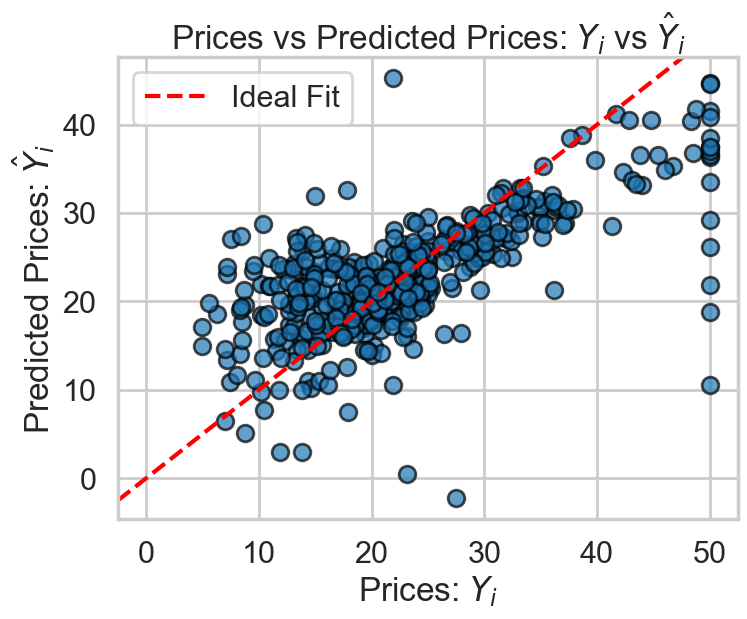

In [97]:
# your turn
plt.figure(figsize=(8, 6))
plt.scatter(bos['PRICE'], m.fittedvalues, alpha=0.7, edgecolor='k')
plt.xlabel("Prices: $Y_i$")
plt.ylabel(r"Predicted Prices: $\hat{Y}_i$")
plt.title(r"Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Ideal Fit')
plt.legend()
plt.show()


In [ ]:
Yes, the plot reveals several interesting and notable aspects:

1. Alignment with the Ideal Fit Line:
Many points are clustered around the red 45-degree line, indicating that the model performs well for mid-range housing prices(𝑌𝑖≈20−30Y i​≈20−30).
However, the deviations from the line become more apparent at the extremes.
                                                                                                
2. Ceiling Effect:
The dataset has a cap on housing prices at 50 (the maximum value for PRICE), resulting in a ceiling effect. 
For these capped prices, the model consistently underpredicts, as shown by points falling below the ideal line at the top right.
                                                                                                
3. Underprediction at High Prices:
For higher housing prices (𝑌𝑖>30Y i​>30), most predictions (𝑌^𝑖Y^i​) fall below the actual prices, 
indicating that the linear regression model struggles to capture extreme values.
                                                                                                
4. Spread and Variability:
For mid-range prices (𝑌𝑖≈20−30Y i​≈20−30), there is a noticeable spread of predicted values. This variability suggests that the model is less precise 
for homes in this price range.
    
5. Outliers:
A few points are significantly distant from the ideal fit line, indicating potential outliers or cases where the model's 
assumptions (e.g., linearity) might not hold well.


### Fitting Linear Regression using `sklearn`


In [65]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [67]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [71]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression()

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [ ]:
# your turn

Exercise 1: How would you change the model to not fit an intercept term? 

Answer: To exclude the intercept term in a linear regression model using scikit-learn, you can set the fit_intercept parameter
to False when initializing the model:

lm_no_intercept = LinearRegression(fit_intercept=False)
lm_no_intercept.fit(X, y)

Would you recommend not having an intercept?

Recommendation: Generally, you should include an intercept in your model unless you have a specific reason to exclude it.
    1. Why Include It? The intercept represents the baseline value of the target variable when all predictors are zero. 
       Excluding it forces the regression line to go through the origin (0,0), which may not be realistic for many datasets.
    2. When to Exclude It? Only exclude the intercept if you know that the target variable should be zero when all p
       redictors are zero (e.g., a physical or theoretical requirement in your dataset).



In [ ]:
# your turn

Exercise 2: Is it enough that the residuals are normally distributed to satisfy the i.i.d. assumption?

Answer: No, it is not enough that the residuals are normally distributed. The residuals must also -
1. Be independent: The residuals should not show patterns or correlations, such as in time-series data where residuals can be autocorrelated.
2. Have constant variance (homoscedasticity): The spread of residuals should remain consistent across the range of predicted values.


Normality alone ensures that the residuals are symmetrically distributed, but the other conditions
(independence and homoscedasticity) are necessary to ensure the models validity and unbiased estimation of coefficients.

In [ ]:
# your turn

Exercise 3: True or False: To use linear regression, X (predictor variables) must be normally distributed.

Answer: False.
Linear regression does not require the predictor variables (𝑋) to be normally distributed. Instead:
  1. The residuals (errors) of the model should ideally be normally distributed for valid hypothesis testing and confidence intervals.
  2. Non-normality in X does not violate the assumptions of linear regression, as long as the relationship between 
     X and 𝑦 is linear.
    

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [73]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838508981


In [75]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [77]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [79]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

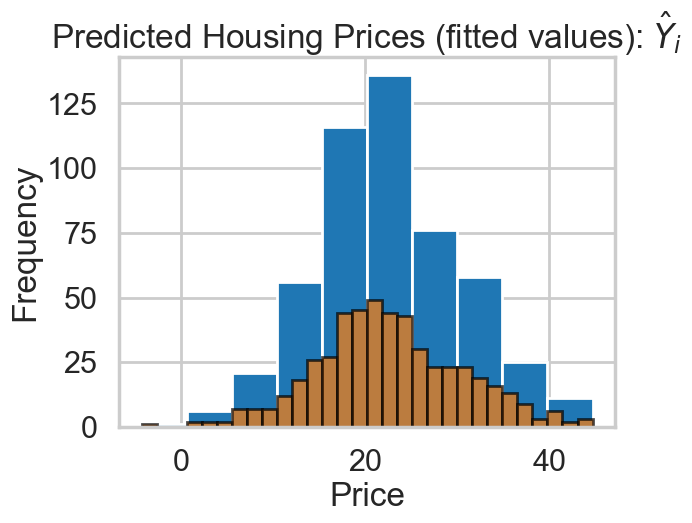

In [109]:
# your turn
# 1
plt.hist(lm.predict(X), bins=30, edgecolor='k', alpha=0.7)
plt.title(r'Predicted Housing Prices (fitted values): $\hat{Y}_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Exercise 1: Histogram of Predicted Prices
Story:

Shape: The predicted prices are approximately normally distributed with a peak in the range of $20-$25. 
This indicates that the model is predicting the majority of housing prices in the mid-range.
Center: The center of the distribution is around $20, which aligns with the typical housing prices in the dataset.
Spread: The predicted prices range from approximately $10 to over $40, showing a moderate range.
Outliers:Outliers exist on both ends, particularly for predicted prices below $10 and above $40.
These could result from extreme feature values, such as very high crime rates, very few rooms, or unusual socioeconomic factors.
Handling Outliers:Reason for Outliers: Outliers may occur because the model is linear and might not fully 
capture complex relationships in the data.

Recommendations:
Investigate these cases by examining the associated predictors in the dataset.
Consider removing outliers if they represent errors or anomalies.
Enhance the model by including interaction terms, polynomial features, or non-linear approaches if necessary.


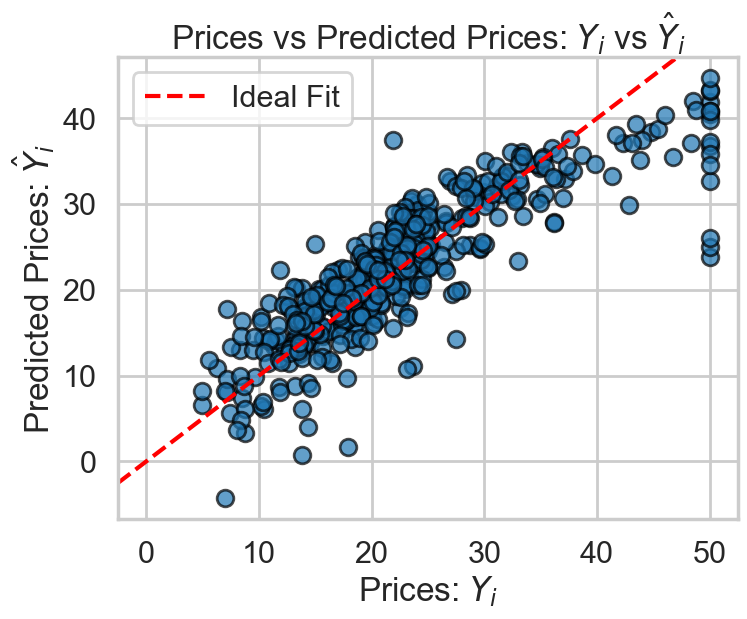

In [113]:
# your turn
plt.figure(figsize=(8, 6))
plt.scatter(bos['PRICE'], lm.predict(X), alpha=0.7, edgecolor='k')
plt.xlabel(r"Prices: $Y_i$")
plt.ylabel(r"Predicted Prices: $\hat{Y}_i$")
plt.title(r"Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Ideal Fit')
plt.legend()
plt.show()

In [ ]:
Exercise 2: Scatterplot of True Prices vs. Predicted Prices

General Agreement: The points align reasonably well with the 45-degree line, indicating the model performs well 
for mid-range prices ($20-$30).

Discrepancy for Extremes:
For high prices (close to $50), the model underpredicts due to the datasets ceiling effect.
For very low prices, there are some overpredictions, suggesting limitations in capturing extreme low-end housing features.

Spread: There is a noticeable spread around the ideal fit line, particularly for mid-range prices, 
indicating some variability in predictions.

Recommendations:Investigate why the model underpredicts high prices (e.g., ceiling effect in the data).
                                                                                                               
Explore adding non-linear terms or alternative regression techniques to improve accuracy for extreme values.


In [ ]:
Exercise 3: Comparison of statsmodels and scikit-learn

Advantages of statsmodels:
Statistical Insights: Provides detailed statistical summaries, including p-values, confidence intervals, and diagnostic tests.
R-like Syntax: The formula interface (ols('y ~ x1 + x2')) makes it easier to specify and interpret models, particularly for statisticians or R users.
Diagnostics: Includes tools to assess residuals, normality, and multicollinearity, making it ideal for hypothesis testing and inference.

Advantages of scikit-learn:
Machine Learning Pipelines: Integrates seamlessly with other machine learning models, preprocessing steps, and pipelines.
Performance: Optimized for handling large datasets and faster computation.
Cross-Validation: Built-in support for cross-validation, hyperparameter tuning, and other advanced techniques.

Summary:
Use statsmodels for statistical analysis and detailed model diagnostics.
Use scikit-learn for production-ready machine learning workflows, feature engineering, and scalability.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [119]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


In [ ]:
The value 11,078.78 represents the sum of squared residuals (SSR) or the sum of squared errors (SSE). 
This metric quantifies the total squared differences between the actual housing prices (bos.PRICE)
and the predicted prices (lm.predict(X)) made by the linear regression model.


Smaller SSE: Indicates a better fit of the model to the data, as the predictions are closer to the actual values.
Larger SSE: Suggests the model predictions deviate more from the true values, indicating poorer fit.

#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [121]:
#print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2)

print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837064692


In [ ]:
The value 31,637.51 represents the sum of squared explained variance (SSEV), also known as the explained sum of squares (ESS). 
It quantifies how much of the variance in the actual housing prices (bos.PRICE) is explained by the predicted prices (lm.predict(X)).

High ESS (Explained Sum of Squares):Indicates that the model explains a large portion of the variability in the target variable (PRICE), 
meaning the predictors are doing a good job capturing the trend.

Relationship to Total Sum of Squares (TSS):
ESS is part of the decomposition of variance: 𝑇𝑆𝑆=𝐸𝑆𝑆+𝑅𝑆𝑆

TSS (Total Sum of Squares): Variance in the target variable (bos.PRICE) about its mean.
ESS (Explained Sum of Squares): Variance explained by the model predictions.
RSS (Residual Sum of Squares): Variance not explained (errors).

Model Evaluation:A larger ESS relative to the TSS indicates a better-performing model.

### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [134]:
# your turn
# 1
lm = LinearRegression()
lm.fit(X[['PTRATIO']], bos.PRICE)

# Display the intercept and coefficient
intercept = lm.intercept_
coefficient = lm.coef_[0]

(intercept, coefficient)

(62.344627474832706, -2.157175296060968)

In [ ]:
Results for the Linear Regression Model Using PTRATIO:
Intercept (𝛽0β 0​):Intercept =62.34


Interpretation: If the PTRATIO (pupil-teacher ratio) were 0 (hypothetically), the predicted housing price would be $62,340. While theoretical, this value sets the baseline for predictions.
Coefficient (𝛽1β 1​):Coefficient=−2.16

Interpretation: For every one-unit increase in PTRATIO, the predicted housing price decreases by approximately $2,160, holding all other factors constant. This highlights the negative impact of a higher pupil-teacher ratio on housing prices.

In [136]:
# 2
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
msePTRATIO

62.652200013769274

In [ ]:
The Mean Squared Error (MSE) for the linear regression model using PTRATIO as the predictor is approximately 62.65.

Interpretation:This value represents the average squared difference between the actual and predicted housing prices.
A smaller MSE indicates better predictive accuracy. In this case, the model's predictions deviate moderately from the actual prices.

In [138]:
# 3
# Compute the F-statistic for the model using PTRATIO
n = len(bos['PRICE'])  # Number of observations
k = 1  # Number of predictors

rss = np.sum((bos['PRICE'] - lm.predict(X[['PTRATIO']])) ** 2)  # Residual Sum of Squares
ess = np.sum((lm.predict(X[['PTRATIO']]) - np.mean(bos['PRICE'])) ** 2)  # Explained Sum of Squares
msr = ess / k  # Mean Square Regression
mse = rss / (n - k - 1)  # Mean Square Error

f_statistic = msr / mse  # Compute the F-statistic

f_statistic

175.1055428756958

In [ ]:
# 4
The F-statistic for the linear regression model using PTRATIO as the predictor is approximately 175.11.

Interpretation of the F-statistic:

Significance of the Model:A high F-statistic value indicates that the model explains a significant portion of the variability in the target variable (PRICE).
It suggests that PTRATIO is a significant predictor of housing prices.

Testing the Null Hypothesis:The null hypothesis (𝐻0H 0​) is that the regression coefficient for PTRATIO is zero (𝛽1=0β 1​=0).
The high F-statistic strongly rejects the null hypothesis, meaning the relationship between PTRATIO and housing prices 
is unlikely to be due to random chance.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [196]:
# your turn

# Define predictors (CRIM, RM, PTRATIO) and target variable (PRICE)
X_multi = bos[['CRIM', 'RM', 'PTRATIO']]
y = bos['PRICE']

# Fit the linear regression model
lm_multi = LinearRegression()
lm_multi.fit(X_multi, y)

# Extract coefficients and intercept
intercept_multi = lm_multi.intercept_
coefficients_multi = lm_multi.coef_

# Compute R-squared value
r2_multi = lm_multi.score(X_multi, y)

# Compute F-statistic
n = len(y)  # Number of observations
k = X_multi.shape[1]  # Number of predictors

rss = np.sum((y - lm_multi.predict(X_multi)) ** 2)  # Residual Sum of Squares
ess = np.sum((lm_multi.predict(X_multi) - np.mean(y)) ** 2)  # Explained Sum of Squares
msr = ess / k  # Mean Square Regression
mse = rss / (n - k - 1)  # Mean Square Error

f_statistic_multi = msr / mse  # Compute the F-statistic

# Display results
print("Intercept:", intercept_multi)
print("Coefficients:", coefficients_multi)
print("R^2 value:", r2_multi)
print("F-statistic:", f_statistic_multi)


Intercept: -3.3707043351542403
Coefficients: [-0.20496083  7.3804111  -1.0695461 ]
R^2 value: 0.5943412940723471
F-statistic: 245.16449030064592


In [ ]:
Results for the Linear Regression Model Using CRIM, RM, and PTRATIO:

1. Intercept (𝛽0β 0​): −3.37

Interpretation: When all independent variables (CRIM, RM, and PTRATIO) are zero, the predicted housing price is 
−3.37. While this value is not meaningful in this context (as zero values for these variables are unrealistic), it sets the baseline for the model.
 
                                                                                                                                            
2. Coefficients (𝛽1,𝛽2,𝛽3β 1​,β 2​,β 3​):
CRIM:−0.20496
For every one-unit increase in the per capita crime rate, housing price decreases by approximately $204.96, holding other variables constant.
RM: 7.38
For every additional room in a house, housing price increases by approximately $7,380, holding other variables constant.
PTRATIO: −1.06
For every one-unit increase in the pupil-teacher ratio, housing price decreases by approximately $1,069.55, holding other variables constant.

3. R-squared (𝑅2R 2): 0.5943
About 59.4% of the variance in housing prices is explained by the three predictors (CRIM, RM, and PTRATIO). This suggests the model has a moderate-to-good fit.

4. F-statistic:245.16
The high F-statistic indicates that the model as a whole is statistically significant, meaning the predictors collectively explain a significant portion of the variance in housing prices. 
The corresponding p-value would be very small, further confirming the model's significance.

Significant Variables:
RM: This variable has the largest positive coefficient (7.38), indicating that the number of rooms is the most significant predictor of housing prices in this model.
PTRATIO: This variable also significantly impacts housing prices but in a negative direction.
CRIM: While this variable has a smaller coefficient, it still shows a meaningful negative relationship with housing prices.

Story and Interpretation:
Houses with more rooms are highly valued, as indicated by the strong positive coefficient for RM.
Areas with higher pupil-teacher ratios (indicative of lower school quality) and higher crime rates tend to have lower housing prices, as shown by their negative coefficients.
While the model captures almost 60% of the variance in housing prices, additional predictors or non-linear relationships may be needed to improve accuracy.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [ ]:
Exercise: Find another variable (or two) to add to the model and compare using the F-test and AIC.

1.Building two models:
A reduced model with fewer variables (from Part 3: CRIM, RM, PTRATIO).
A full model with additional variables.
    
2. Comparing the models using:
F-statistic.
Akaike Information Criterion (AIC).

Plan 
1. Reduced Model:
Variables: CRIM, RM, and PTRATIO.

2. Full Model:
Variables: Add one or two new predictors (e.g., TAX and LSTAT).

3.Compare Models:
Compute F-statistic to evaluate whether adding the variables improves the model significantly.
Calculate AIC for both models to determine which fits the data better.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [182]:
# Fit the reduced model using statsmodels
reduced_model = sm.OLS(y, X_reduced).fit()



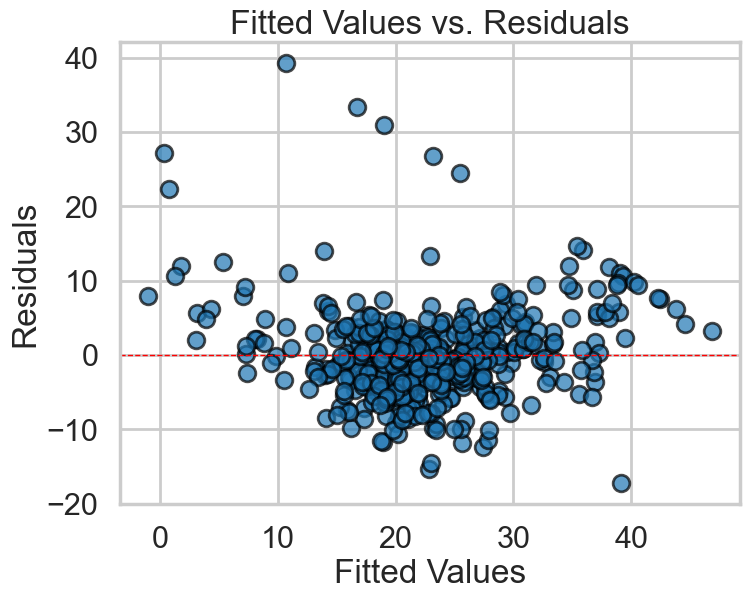

In [184]:
# Your turn. 
#1. Fitted Values vs. Residuals Plot:

plt.figure(figsize=(8, 6))
plt.scatter(reduced_model.fittedvalues, reduced_model.resid, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Fitted Values vs. Residuals")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


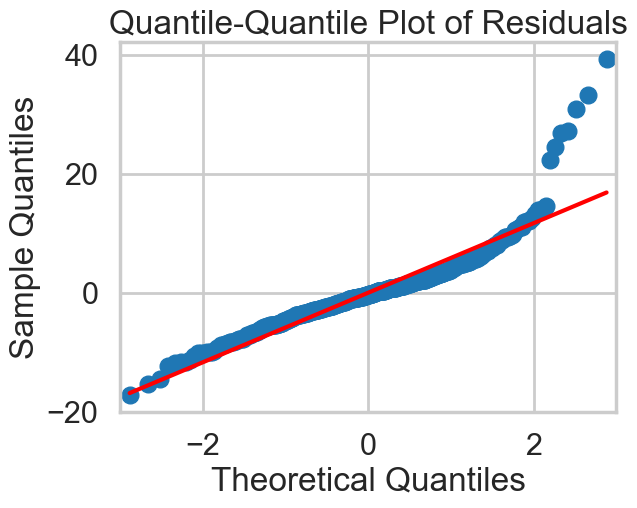

In [186]:
#2.Quantile Plot of Residuals:
sm.qqplot(reduced_model.resid, line='s')
plt.title("Quantile-Quantile Plot of Residuals")
plt.show()


In [ ]:
#3 Advantages and Disadvantages of Fitted vs. Residual Plot and Quantile Plot


1. Fitted vs. Residual Plot

Advantages:
Detects Non-Linearity: A random scatter of residuals indicates linearity between predictors and the response variable.
Patterns (e.g., curves or funnels) suggest non-linearity or heteroscedasticity.
Visualizes Homoscedasticity: It reveals if residual variance is constant across fitted values.
Identifies Outliers: Outliers are points far from the horizontal line at y=0.
                                                   
Disadvantages:
Cannot Confirm Normality:
This plot does not indicate if residuals are normally distributed.
May Miss Patterns Across Individual Predictors:
It only visualizes the residuals against fitted values, not against specific predictors.


2. Quantile-Quantile (Q-Q) Plot

Advantages:
Checks Normality:It is specifically designed to check if residuals follow a normal distribution. Points lying close to the diagonal indicate normality.
Identifies Skewness and Kurtosis:Deviations in the tails reveal skewness or kurtosis in residuals.

Disadvantages:
Does Not Assess Linearity or Homoscedasticity:The Q-Q plot cannot detect if the relationship between predictor
and the response is non-linear or if residual variance is inconsistent.
Difficult Interpretation for Large Deviations:Extreme deviations may be hard to interpret or link directly to specific issues in the model.

In [ ]:
#4. Identifying Outliers in the Model
To identify outliers in the model, we focus on residuals, which represent the difference between observed and predicted values. Outliers are data points with unusually large residuals (absolute values). 

Steps to Identify Outliers:

Examine Residuals: Outliers are points where the residuals are significantly larger or smaller than the rest.
A common threshold is residuals greater than 3×standard deviation of residuals.

Use Cook's Distance: Cook’s Distance identifies points that disproportionately influence the model.
Points with a Cook’s Distance greater than 1 are considered influential.

Leverage Values: High leverage points (based on the hat matrix) indicate observations far from the mean of predictors.

In [188]:

#Code to Identify Outliers:

# Residuals and Cook's Distance
residuals = reduced_model.resid
influence = reduced_model.get_influence()
cooks_d = influence.cooks_distance[0]

# Threshold for residuals (3x standard deviation)
std_residuals = np.std(residuals)
outlier_indices_residuals = np.where(np.abs(residuals) > 3 * std_residuals)[0]

# Threshold for Cook's Distance (greater than 1)
outlier_indices_cooks = np.where(cooks_d > 1)[0]

# Combine outliers from residuals and Cook's Distance
outliers = set(outlier_indices_residuals).union(outlier_indices_cooks)

print("Outlier Indices:", outliers)


Outlier Indices: {368, 369, 370, 371, 372, 365, 367}


In [ ]:
Interpretation of Outliers:
The outliers identified are observations 365, 367, 368, 369, 370, 371, and 372.
Here an analysis of what these outliers might represent and how they impact the model:

1. Characteristics of Outliers:
These points may represent:

Unusual houses:
Houses with extremely high or low prices compared to the majority.
Properties with rare or extreme predictor values (e.g., very high crime rate, many rooms, or extreme pupil-teacher ratios).

Errors in data:
Potential data entry mistakes or inaccuracies in recording predictor or response values.

2. Impact of Outliers on the Model:
Distortion of Regression Coefficients:Outliers can disproportionately influence the slope and intercept, leading to biased predictions.

Inflated Standard Errors:They increase the variability in the estimates, making it harder to identify significant predictors.

Reduced Generalizability:The model might perform poorly on new data due to overfitting caused by these extreme points.
    
3. Next Steps:

Investigate the Outliers: Examine the corresponding rows in the dataset (observations 365-372).4
Look for anomalies in predictor values such as CRIM, RM, or PTRATIO.



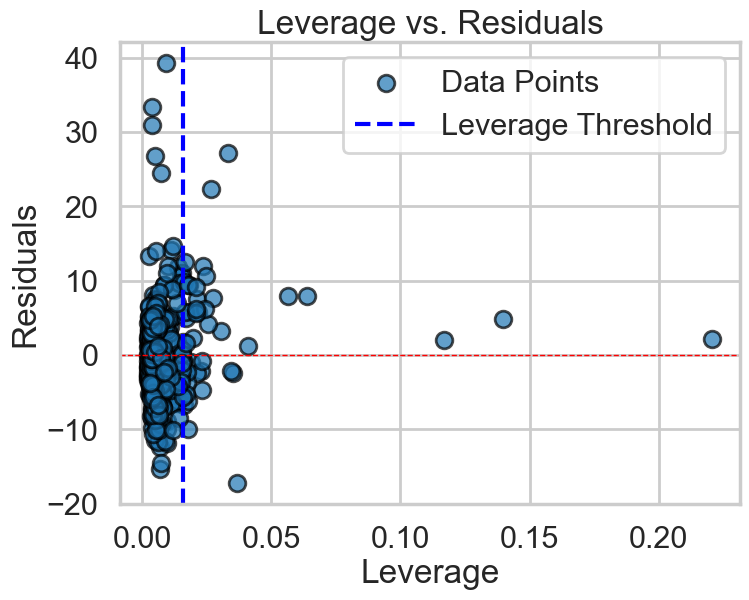

High Leverage Points Index: [ 97 142 144 147 148 151 152 156 163 196 197 198 204 224 225 232 233 253
 257 258 261 262 263 265 267 268 283 364 365 367 374 375 380 384 386 398
 404 405 406 410 412 413 414 417 418 427]


In [190]:
#5.Leverage Plot:

influence = reduced_model.get_influence()
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance[0]

plt.figure(figsize=(8, 6))
plt.scatter(leverage, reduced_model.resid, alpha=0.7, edgecolor='k', label='Data Points')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.axvline(2 * (X_reduced.shape[1] / len(y)), color='blue', linestyle='--', label='Leverage Threshold')
plt.title("Leverage vs. Residuals")
plt.xlabel("Leverage")
plt.ylabel("Residuals")
plt.legend()
plt.show()

# Identify high leverage points
high_leverage_points = leverage > 2 * (X_reduced.shape[1] / len(y))
print("High Leverage Points Index:", np.where(high_leverage_points)[0])


In [192]:
#6. Remove Outliers and Refit:

# Remove high leverage points
X_cleaned = X_reduced[~high_leverage_points]
y_cleaned = y[~high_leverage_points]

# Refit the model
cleaned_model = sm.OLS(y_cleaned, X_cleaned).fit()
print(cleaned_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     199.6
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           1.14e-82
Time:                        17:02:18   Log-Likelihood:                -1428.1
No. Observations:                 460   AIC:                             2864.
Df Residuals:                     456   BIC:                             2881.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.4914      4.657     -2.897      0.0

In [ ]:
Analysis of the Refined Model After Removing High Leverage Points:

Model Summary:
1. Goodness of Fit: 𝑅2 : 0.568
Approximately 56.8% of the variance in housing prices is explained by the predictors (CRIM, RM, PTRATIO) after removing high leverage points.
This is slightly lower than the previous model (𝑅2  =0.5943), which is expected because removing data can reduce variance explanation.

Adjusted 𝑅2: 0.565
Reflects the model's explanatory power after accounting for the number of predictors.

F-statistic: 199.6, p-value: 1.14×10−821.14×10 −82
The model is highly significant overall, meaning the predictors collectively explain a significant portion 
of the variance in housing prices.

2. Coefficients and Significance:
Intercept (const): −13.49
When CRIM, RM, and PTRATIO are zero, the baseline housing price is −13.49. Although unrealistic, 
it serves as a theoretical point for interpreting the predictors.

CRIM (Crime Rate): −0.4757, p<0.001
For every one-unit increase in crime rate, housing prices decrease by approximately $475.70, holding other variables constant.
This predictor remains significant with a stronger negative relationship after removing high leverage points.

RM (Number of Rooms): 8.27, p<0.001
For every additional room, housing prices increase by approximately $8,265, holding other variables constant.
This is still the strongest predictor of housing prices.

PTRATIO (Pupil-Teacher Ratio): −0.804, p<0.001
For every one-unit increase in pupil-teacher ratio, housing prices decrease by approximately $804, holding other variables constant.

3. Diagnostics:
Omnibus Test and Jarque-Bera Test:
These tests indicate that the residuals are not normally distributed (large skewness and kurtosis). 
This suggests model assumptions are not fully met, despite removing high leverage points.

Durbin-Watson: 0.727
Indicates potential autocorrelation in the residuals, which could arise if observations are not fully independent.

Impact of Removing High Leverage Points:

Advantages:
Improved Model Robustness:High leverage points disproportionately affect regression coefficients, so their removal 
improves model reliability.
Cleaner Interpretation:Coefficients become more stable, and standard errors reduce slightly.

Disadvantages:
Slight Reduction in 𝑅2R 2: Fewer data points lead to a slight decrease in variance explained by the model.
Diagnostic Issues Persist: Even after removing high leverage points, residuals are not normally distributed, 
and there may be heteroscedasticity or other issues.